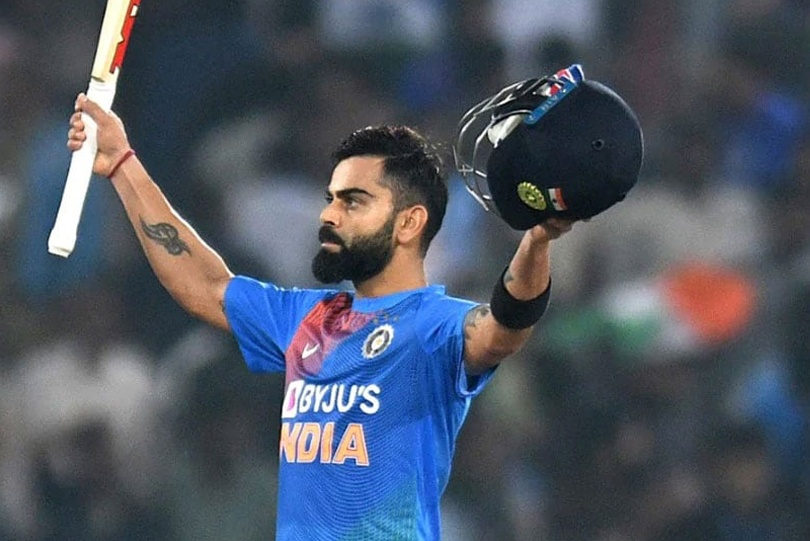

In [3]:
#!pip install bqplot
#!pip install ipywidgets
#!pip install ipympl
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager
#!jupyter nbextension install --user --py widgetsnbextension
#!jupyter nbextension enable --user --py widgetsnbextension
#!pip install plotly
#!pip install cufflinks


import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import ipywidgets as widgets
import plotly.express as px
import plotly.graph_objects as go
import bqplot
from bqplot import Pie
from collections import Counter
from bqplot import DateScale, LinearScale, Lines, Axis, Figure
from bqplot import Tooltip
import cufflinks as cf
from matplotlib.patches import ConnectionPatch
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
pd.set_option('display.max_columns', 50)
%matplotlib widget


# A) Dataset 1 

## Parsing the table for Virat Kohli's dismissal stats

In [4]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

#dismissal stats for T20Is(2010-2020)
url_T20 = "https://stats.espncricinfo.com/ci/engine/player/253802.html?class=3;template=results;type=batting;view=dismissal_summary"
#dismissal stats for ODI
url_ODI = "https://stats.espncricinfo.com/ci/engine/player/253802.html?class=2;template=results;type=batting;view=dismissal_summary"
#dismissal stats for Test
url_test = "https://stats.espncricinfo.com/ci/engine/player/253802.html?class=1;template=results;type=batting;view=dismissal_summary"

def htmlData_parser(url):
    column_=[]
    response = requests.get(url) 
    cric_data = BeautifulSoup(response.content, 'html.parser')
    container = cric_data.find("caption", text="Dismissal summary").find_parent("table")
    attr = container.find_all("tbody")
    for i in range(len(attr)):
        table_col = attr[i].find_all("td")
        for j in range(len(table_col)):
            column_.append(table_col[j].text)
    return column_

# Collect a required data
def required_data(column):
    dismissal_list = [column[0:15], column[15:30], column[30:45], column[46:61], column[61:76], column[76:91], column[92:107],
                 column[107:122], column[122:137],column[137:152], column[152:167], column[168:183],
                 column[183:198],column[198:213],column[213:228], column[228:243], column[243:258],
                 column[259:274], column[274:289], column[289:304], column[304:319], column[319:334],
                 column[334:349], column[349:364], column[364:379],column[380:395], column[395:410], 
                column[410:425], column[425:440], column[440:455]]
    return dismissal_list

def required_data_ODI(column):
    dismissal_list1 = [column[0:15], column[15:30], column[30:45], column[46:61], column[61:76], column[76:91], column[92:107],
                 column[107:122], column[122:137],column[137:152], column[152:167], column[168:183],
                 column[183:198],column[198:213],column[213:228], column[228:243], column[243:258],
                 column[258:273], column[274:289], column[289:304],column[304:319], column[319:334],
                 column[334:349], column[349:364], column[364:379], column[379:394], column[394:409], 
                 column[409:424], column[425:440], column[440:455], column[455:470], column[470:485], column[485:500],
                 column[500:515]]
    return dismissal_list1

def required_data_Test(column):
    dismissal_list2 = [column[0:15], column[15:30], column[30:45], column[46:61], column[61:76], column[76:91], column[92:107],
                 column[107:122], column[122:137],column[137:152], column[152:167], column[168:183],
                 column[183:198],column[198:213],column[213:228], column[228:243],
                       column[259:274], column[274:289], column[289:304],column[304:319], column[319:334],
                 column[334:349], column[349:364], column[364:379], column[379:394], column[394:409], 
                 column[409:424], column[425:440], column[440:455], column[455:470], column[470:485], column[485:500],
                 column[500:515]
                 ]
    return dismissal_list2
 

## Creating a data frame from parsed data

## Data for T20Is(2010 - 2020)

In [5]:
data_T20 = htmlData_parser(url_T20)
dismissal_list_T20 = required_data(data_T20)

dismissal_summary_T20 = pd.DataFrame(columns=['dismissal', 'span', 'Dis', 'bwd', 'c_fie', 'c_wk', 'st', 'lbw', 'hw', 'ro','oth','no','ave','0s','remove'], data=dismissal_list_T20)
dismissal_summary_T20.drop('remove', axis=1, inplace=True)
dismissal_summary_T20["batsman"] = "Virat Kohli"
#dismissal_summary_T20.to_csv("VKohli_T20.csv")
dismissal_summary_T20["match_type"] = "T20"


## Data for ODI(2008 - 2019/20)


In [6]:
data_ODI = htmlData_parser(url_ODI)
dismissal_list_ODI = required_data_ODI(data_ODI)

dismissal_summary_ODI = pd.DataFrame(columns=['dismissal', 'span', 'Dis', 'bwd', 'c_fie', 'c_wk', 'st', 'lbw', 'hw', 'ro','oth','no','ave','0s','remove'], data=dismissal_list_ODI)
dismissal_summary_ODI.drop('remove', axis=1, inplace=True)
dismissal_summary_ODI["batsman"] = "Virat Kohli"
#dismissal_summary_ODI.to_csv("VKohli_ODI.csv")
dismissal_summary_ODI["match_type"] = "ODI"


## Data for Test(2011 - 2019/20)

In [7]:
data_Test = htmlData_parser(url_test)
dismissal_list_Test = required_data_Test(data_Test)

dismissal_summary_Test = pd.DataFrame(columns=['dismissal', 'span', 'Dis', 'bwd', 'c_fie', 'c_wk', 'st', 'lbw', 'hw', 'ro','oth','no','ave','0s','remove'], data=dismissal_list_Test)
dismissal_summary_Test.drop('remove', axis=1, inplace=True)
dismissal_summary_Test["batsman"] = "Virat Kohli"
#dismissal_summary_Test.to_csv("VKohli_Test.csv")
dismissal_summary_Test["match_type"] = "Test"


In [8]:
display_side_by_side([dismissal_summary_T20, dismissal_summary_Test, dismissal_summary_ODI],
                     ["1) Dismissal Summary of V Kohli in T20", "2) Dismissal Summary of V Kohli in Test",
                     "3) Dismissal Summary of V Kohli in ODI"])

,dismissal,span,Dis,bwd,c_fie,c_wk,st,lbw,hw,ro,oth,no,ave,0s,batsman,match_type
0,right-arm bowler,2011-2020,40,5,26,7,0,2,0,0,0,0,27.12,1,Virat Kohli,T20
1,left-arm bowler,2012-2019,10,1,6,2,0,1,0,0,0,0,36.80,1,Virat Kohli,T20
2,unknown arm,2012-2020,5,0,0,0,0,0,0,5,0,0,26.60,0,Virat Kohli,T20
3,pace bowler,2011-2020,37,3,25,7,0,2,0,0,0,0,29.24,2,Virat Kohli,T20
4,spin bowler,2011-2019,13,3,7,2,0,1,0,0,0,0,28.53,0,Virat Kohli,T20
5,mixture/unknown,2012-2020,5,0,0,0,0,0,0,5,0,0,26.60,0,Virat Kohli,T20
6,right-arm pace,2011-2020,30,2,20,6,0,2,0,0,0,0,27.56,1,Virat Kohli,T20
7,right-arm spin,2011-2019,10,3,6,1,0,0,0,0,0,0,25.80,0,Virat Kohli,T20
8,left-arm pace,2012-2019,7,1,5,1,0,0,0,0,0,0,36.42,1,Virat Kohli,T20
9,left-arm spin,2012-2018,3,0,1,1,0,1,0,0,0,0,37.66,0,Virat Kohli,T20


## CSV file

In [9]:
vkohli_dismissal_data = dismissal_summary_T20.append(dismissal_summary_Test,ignore_index = True).append(dismissal_summary_ODI, ignore_index = True)
vkohli_dismissal_data.to_csv("VKohli_dismissal_data.csv")

# B) Dataset 2

# List of Dismissals


In [10]:
def htmlData_parser_dismissals(url):
    column_=[]
    response = requests.get(url) 
    cric_data = BeautifulSoup(response.content, 'html.parser')
    container = cric_data.find("caption", text="List of dismissals").find_parent("table")
    attr = container.find_all("tbody")
    for i in range(len(attr)):
        table_col = attr[i].find_all("td")
        for j in range(len(table_col)):
            column_.append(table_col[j].text)
    return column_

def split_list (x, list_):
   return [list_[i:i+x] for i in range(0, len(list_), x)]

In [11]:
def list_of_dismissal(url_ra_pace, url_ra_spin, url_la_pace, url_la_spin, match_type):
    
    ## Type of bowler : right arm pace
    
    right_arm_pace = htmlData_parser_dismissals(url_ra_pace)
    right_arm_pace_list = split_list(10, right_arm_pace)
    dismissal_summary_ra = pd.DataFrame(columns=['how out', 'fielder', 'bowler', 'runs', 'Inns', 'remove', 'opposition','Ground', 'Start Date', 'Test_no'], data=right_arm_pace_list)
    dismissal_summary_ra.drop('remove', axis=1, inplace=True)
    dismissal_summary_ra["batsman"] = "Virat Kohli"
    dismissal_summary_ra["bowler_type"] = "right_arm_pace"
    dismissal_summary_ra["match_type"]  = match_type
    
    ## Type of bowler : right-arm spin
    
    right_arm_spin = htmlData_parser_dismissals(url_ra_spin)
    right_arm_spin_list = split_list(10, right_arm_spin)
    dismissal_summary_rs = pd.DataFrame(columns=['how out', 'fielder', 'bowler', 'runs', 'Inns', 'remove', 'opposition','Ground', 'Start Date', 'Test_no'], data=right_arm_spin_list)
    dismissal_summary_rs.drop('remove', axis=1, inplace=True)
    dismissal_summary_rs["batsman"] = "Virat Kohli"
    dismissal_summary_rs["bowler_type"] = "right_arm_spin"
    dismissal_summary_rs["match_type"]  = match_type
    
    ## Type of bowler : left arm pace
    
    left_arm_pace = htmlData_parser_dismissals(url_la_pace)
    left_arm_pace_list = split_list(10, left_arm_pace)
    dismissal_summary_la = pd.DataFrame(columns=['how out', 'fielder', 'bowler', 'runs', 'Inns', 'remove', 'opposition','Ground', 'Start Date', 'Test_no'], data=left_arm_pace_list)
    dismissal_summary_la.drop('remove', axis=1, inplace=True)
    dismissal_summary_la["batsman"] = "Virat Kohli"
    dismissal_summary_la["bowler_type"] = "left_arm_pace"
    dismissal_summary_la["match_type"]  = match_type
    
    ## Type of bowler : Left Arm Spin
    
    left_arm_spin = htmlData_parser_dismissals(url_la_spin)
    left_arm_spin_list = split_list(10, left_arm_spin)
    dismissal_summary_ls = pd.DataFrame(columns=['how out', 'fielder', 'bowler', 'runs', 'Inns', 'remove', 'opposition','Ground', 'Start Date', 'Test_no'], data=left_arm_spin_list)
    dismissal_summary_ls.drop('remove', axis=1, inplace=True)
    dismissal_summary_ls["batsman"] = "Virat Kohli"
    dismissal_summary_ls["bowler_type"] = "left_arm_spin"
    dismissal_summary_ls["match_type"]  = match_type
    list_of_dismissal_Test = dismissal_summary_ra.append(dismissal_summary_rs, ignore_index = True).append(dismissal_summary_la, ignore_index = True).append(dismissal_summary_ls, ignore_index = True)
    return list_of_dismissal_Test



# 1. Test(2011 - 2019/20)

In [12]:

def get_urls_data(url):
    href = []
    response1 = requests.get(url) 
    cric_data1 = BeautifulSoup(response1.content, 'html.parser')
    container1 = cric_data1.find("caption", text="List of dismissals").find_parent("table")
    attr1 = container1.find_all("tbody")
    for i in range(len(attr1)):
        table_col1 = attr[i].find_all("a")
        for j in range(len(table_col1)):
            if "/match/" in table_col1[j].get("href"):
                link = "https://www.espncricinfo.com" + table_col1[j].get("href")
                #print(link)
                href.append(link)
    return href


def get_comments(href):
    comment =[]
    for i in href:
        t =i 
        response1 = requests.get(t) 
        cric_data1 = BeautifulSoup(response1.content, 'html.parser')
        data_=[] 
        for i1 in cric_data1:
            data_.append(i1)
            
        x =("%s\n" % data_)
        for i2 in x.split('"commentary":'):
            if "Virat" in i2:
                #print(i)
                c2 = t + i2.split('"')[1]
                comment.append(c2)
    return comment
        

In [13]:
url_ra_pace = "https://stats.espncricinfo.com/ci/engine/player/253802.html?bowling_hand_pacespin=11;class=1;template=results;type=batting;view=dismissal_list"
url_ra_spin = "https://stats.espncricinfo.com/ci/engine/player/253802.html?bowling_hand_pacespin=12;class=1;template=results;type=batting;view=dismissal_list"
url_la_pace = "https://stats.espncricinfo.com/ci/engine/player/253802.html?bowling_hand_pacespin=21;class=1;template=results;type=batting;view=dismissal_list"
url_la_spin ="https://stats.espncricinfo.com/ci/engine/player/253802.html?bowling_hand_pacespin=22;class=1;template=results;type=batting;view=dismissal_list"


list_of_dismissal_Test_vk = list_of_dismissal(url_ra_pace, url_ra_spin, url_la_pace, url_la_spin, "Test")


# 2. ODI 

In [14]:
url_ra_pace1 = "https://stats.espncricinfo.com/ci/engine/player/253802.html?bowling_hand_pacespin=11;class=2;template=results;type=batting;view=dismissal_list"
url_ra_spin1 = "https://stats.espncricinfo.com/ci/engine/player/253802.html?bowling_hand_pacespin=12;class=2;template=results;type=batting;view=dismissal_list"
url_la_pace1 = "https://stats.espncricinfo.com/ci/engine/player/253802.html?bowling_hand_pacespin=21;class=2;template=results;type=batting;view=dismissal_list"
url_la_spin1 ="https://stats.espncricinfo.com/ci/engine/player/253802.html?bowling_hand_pacespin=22;class=2;template=results;type=batting;view=dismissal_list"

list_of_dismissal_ODI_vk = list_of_dismissal(url_ra_pace1, url_ra_spin1, url_la_pace1, url_la_spin1, "ODI")


# 3. T20

In [15]:
url_ra_pace2 = "https://stats.espncricinfo.com/ci/engine/player/253802.html?bowling_hand_pacespin=11;class=3;template=results;type=batting;view=dismissal_list"
url_ra_spin2 = "https://stats.espncricinfo.com/ci/engine/player/253802.html?bowling_hand_pacespin=12;class=3;template=results;type=batting;view=dismissal_list"
url_la_pace2 = "https://stats.espncricinfo.com/ci/engine/player/253802.html?bowling_hand_pacespin=21;class=3;template=results;type=batting;view=dismissal_list"
url_la_spin2 ="https://stats.espncricinfo.com/ci/engine/player/253802.html?bowling_hand_pacespin=22;class=3;template=results;type=batting;view=dismissal_list"

list_of_dismissal_T20_vk = list_of_dismissal(url_ra_pace2, url_ra_spin2, url_la_pace2, url_la_spin2, "T20")
display_side_by_side([list_of_dismissal_Test_vk, list_of_dismissal_T20_vk, list_of_dismissal_ODI_vk],
                    ["1) List of diamissals in Test", "2) List of diamissals in T20",
                    "3) List of diamissals in ODI"])

,how out,fielder,bowler,runs,Inns,opposition,Ground,Start Date,Test_no,batsman,bowler_type,match_type
0,caught,CS Baugh,FH Edwards,4,1,v West Indies,Kingston,20 Jun 2011,Test # 1997,Virat Kohli,right_arm_pace,Test
1,caught,CS Baugh,FH Edwards,15,3,v West Indies,Kingston,20 Jun 2011,Test # 1997,Virat Kohli,right_arm_pace,Test
2,caught,DJG Sammy,R Rampaul,0,1,v West Indies,Bridgetown,28 Jun 2011,Test # 1998,Virat Kohli,right_arm_pace,Test
3,caught,DJG Sammy,FH Edwards,27,3,v West Indies,Bridgetown,28 Jun 2011,Test # 1998,Virat Kohli,right_arm_pace,Test
4,caught,CS Baugh,DJG Sammy,30,2,v West Indies,Roseau,6 Jul 2011,Test # 1999,Virat Kohli,right_arm_pace,Test
5,caught,BJ Haddin,BW Hilfenhaus,11,2,v Australia,Melbourne,26 Dec 2011,Test # 2025,Virat Kohli,right_arm_pace,Test
6,lbw,,BW Hilfenhaus,0,4,v Australia,Melbourne,26 Dec 2011,Test # 2025,Virat Kohli,right_arm_pace,Test
7,caught,BJ Haddin,PM Siddle,23,1,v Australia,Sydney,3 Jan 2012,Test # 2027,Virat Kohli,right_arm_pace,Test
8,lbw,,JL Pattinson,9,3,v Australia,Sydney,3 Jan 2012,Test # 2027,Virat Kohli,right_arm_pace,Test
9,caught,DA Warner,PM Siddle,44,1,v Australia,Perth,13 Jan 2012,Test # 2029,Virat Kohli,right_arm_pace,Test


## CSV File


In [16]:
list_of_dismissal_combined = list_of_dismissal_Test_vk.append(list_of_dismissal_ODI_vk, ignore_index = True).append(list_of_dismissal_T20_vk, ignore_index = True)
list_of_dismissal_combined.to_csv("list_of_dismissal_VKohli.csv")

# Analysis:

In [ ]:
import numpy as np
import cufflinks as cf
bowling_style = ['right-arm pace','right-arm spin', 'left-arm pace', 'left-arm spin']
cf1 = vkohli_dismissal_data[vkohli_dismissal_data.dismissal.isin(bowling_style)]
for i in bowling_style:
    ti = "Dismissal Record for Virat Kohli against " + i + " bowlers" 
    cf.set_config_file(theme='pearl',sharing='public',offline=True)
    cf1[cf1.dismissal==i].iplot(kind="bar",x = "match_type",
                subplots=True,
                sortbars=True,
                keys = ['Dis', 'bwd', 'c_fie', 'c_wk', 'st', 'lbw', 'hw', 'ro', 'oth', 'no', 'ave', '0s'],
                title=ti,
                theme="henanigans")

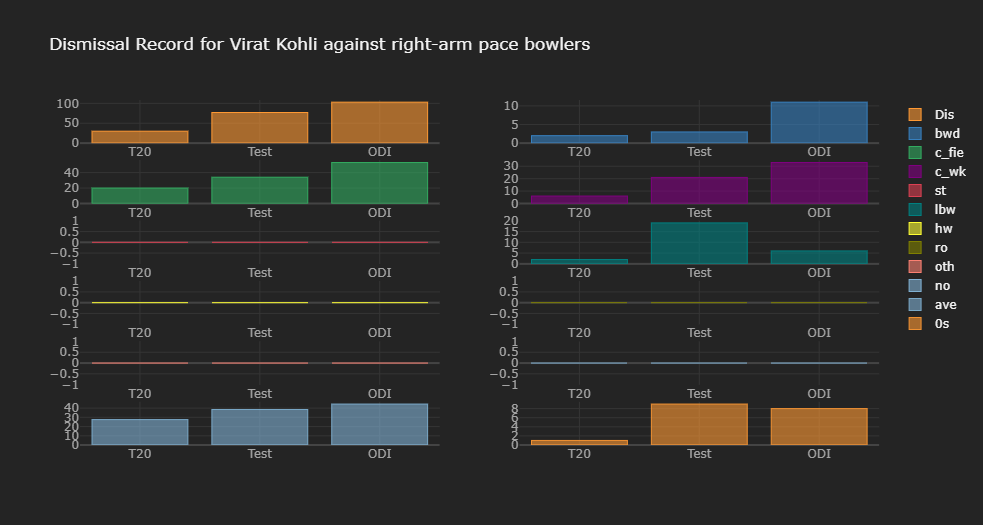

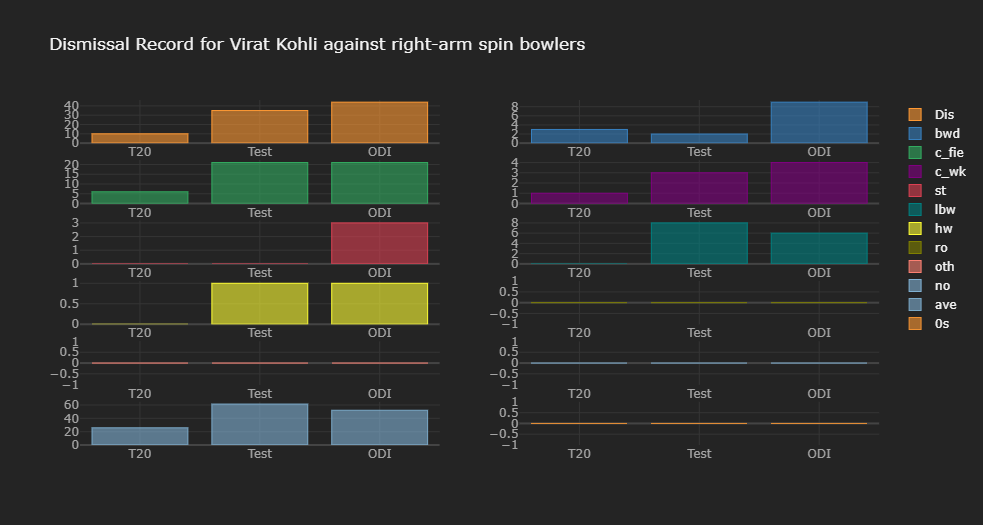

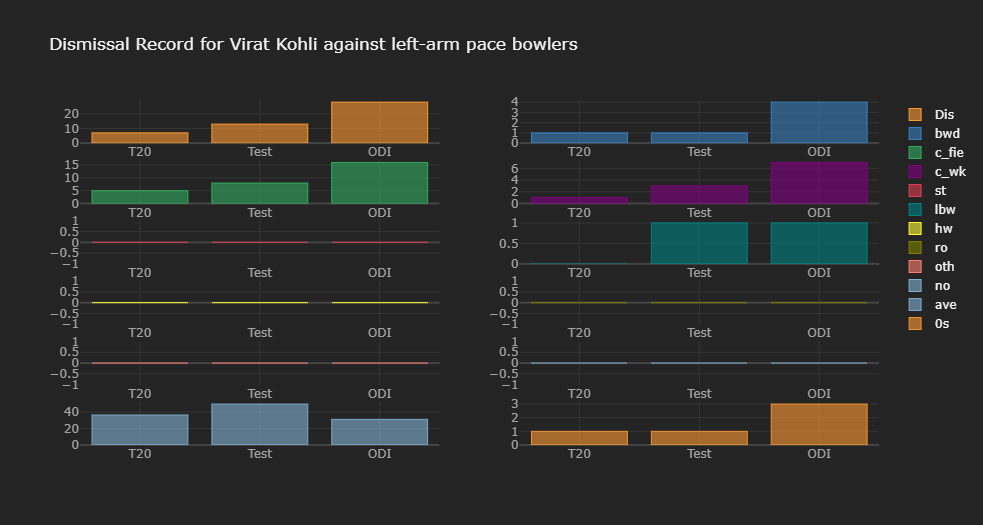

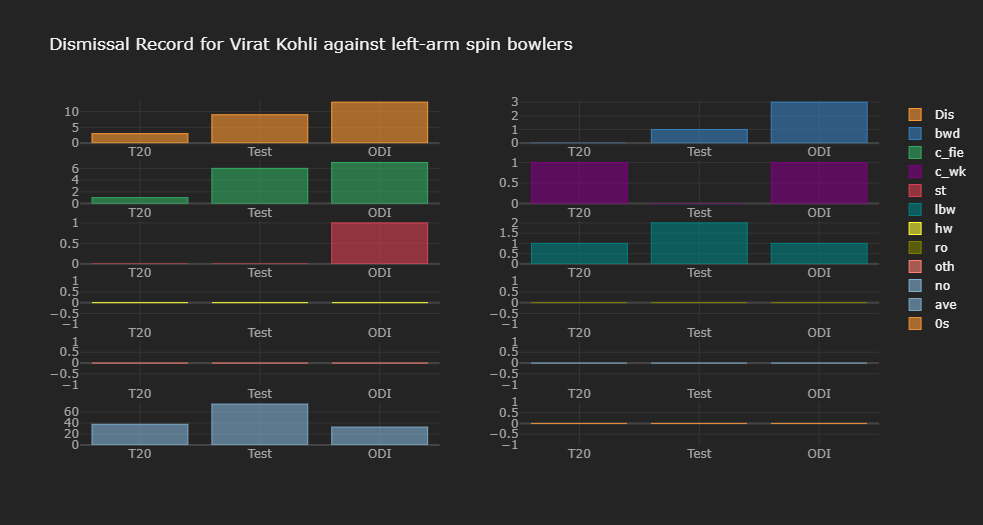

# 1) Right Arm Pace 
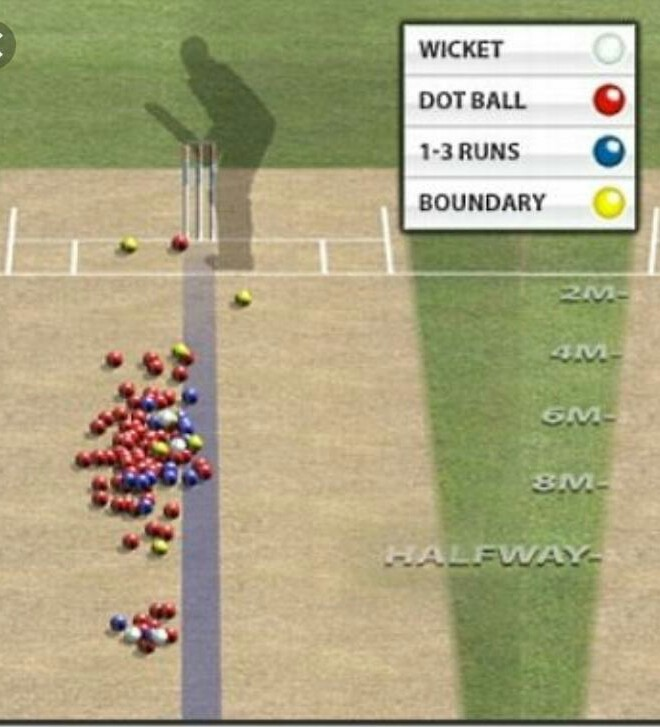

## Kohli always struggles against outswing from  Right Arm Fast bowlers.<br> 
### When ball pitches on good length and near outside off stump line.<br> Many times he nicked it to the wicket keeper.<br> c_wk (caught by wicket keeper) count is evidence of that.


In [18]:
vkohli_dismissal_data[vkohli_dismissal_data.dismissal =='right-arm pace']


,dismissal,span,Dis,bwd,c_fie,c_wk,st,lbw,hw,ro,oth,no,ave,0s,batsman,match_type
6,right-arm pace,2011-2020,30,2,20,6,0,2,0,0,0,0,27.56,1,Virat Kohli,T20
36,right-arm pace,2011-2020,77,3,34,21,0,19,0,0,0,0,38.53,9,Virat Kohli,Test
69,right-arm pace,2008-2020,103,11,53,33,0,6,0,0,0,0,44.45,8,Virat Kohli,ODI


In [136]:
data_ra_pacers = list_of_dismissal_combined[list_of_dismissal_combined.bowler_type == 'right_arm_pace']

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x = "how out", hue = "match_type",data = data_ra_pacers)
plt.legend(prop={'size':10})
plt.title("Virat Kohli's dismissal by Right Arm Pacers",fontsize=30)
plt.xlabel("Dismissal_kind",fontsize=30)
plt.ylabel("Dismissal count",fontsize=30)


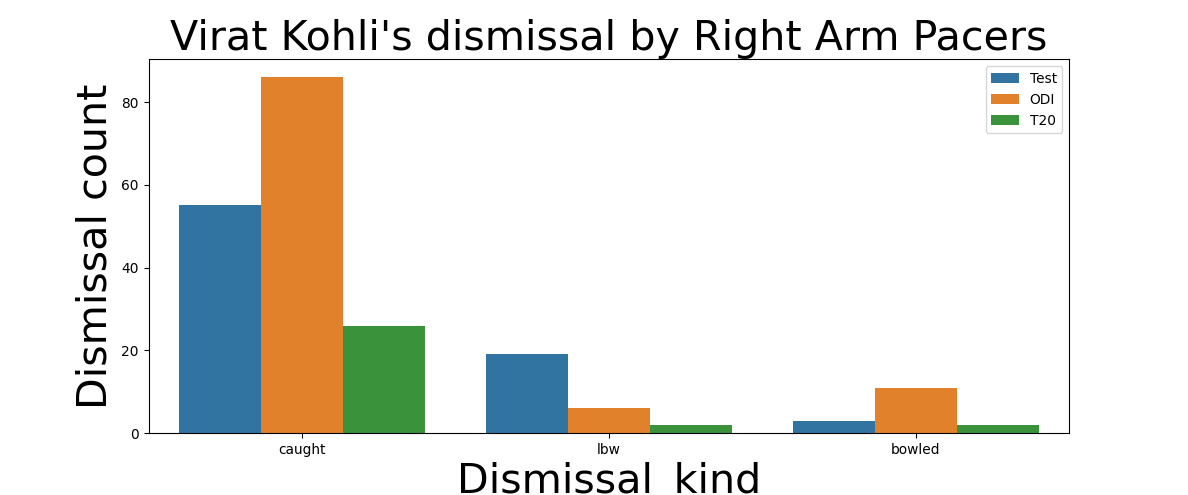

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(x = "bowler", hue = "how out",data = data_ra_pacers[data_ra_pacers.match_type == "Test"])
plt.legend(prop={'size':10})
plt.title("Virat Kohli's dismissal by Right Arm Pacers in Test matches",fontsize=14)
plt.xlabel("Bowlers",fontsize=12)
plt.ylabel("Dismissal count",fontsize=12)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14,6))
sns.countplot(x = "bowler", hue = "how out",data = data_ra_pacers[data_ra_pacers.match_type == "T20"])
plt.legend(prop={'size':10})
plt.title("Virat Kohli's dismissal by Right Arm Pacers in T20",fontsize=14)
plt.xlabel("Bowlers",fontsize=12)
plt.ylabel("Dismissal count",fontsize=12)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14,6))
sns.countplot(x = "bowler", hue = "how out",data = data_ra_pacers[data_ra_pacers.match_type == "ODI"])
plt.legend(prop={'size':10})
plt.title("Virat Kohli's dismissal by Right Arm Pacers in ODI",fontsize=14)
plt.xlabel("Bowlers",fontsize=12)
plt.ylabel("Dismissal count",fontsize=12)
plt.xticks(rotation=90)
plt.show()


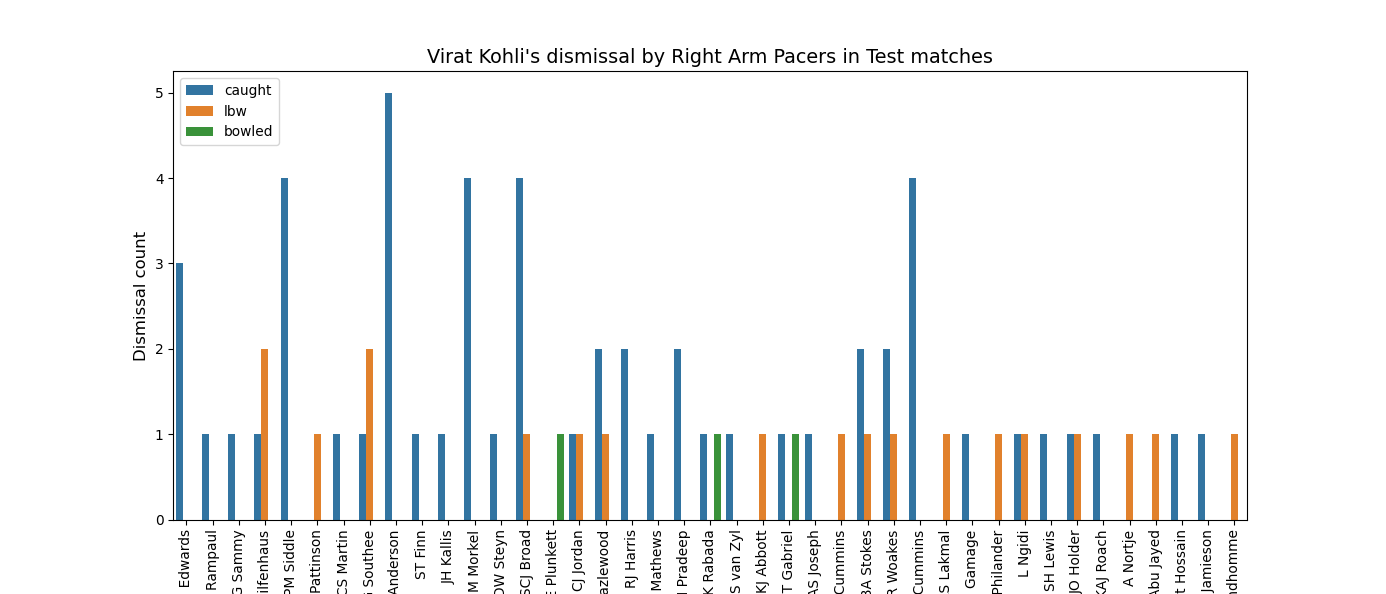

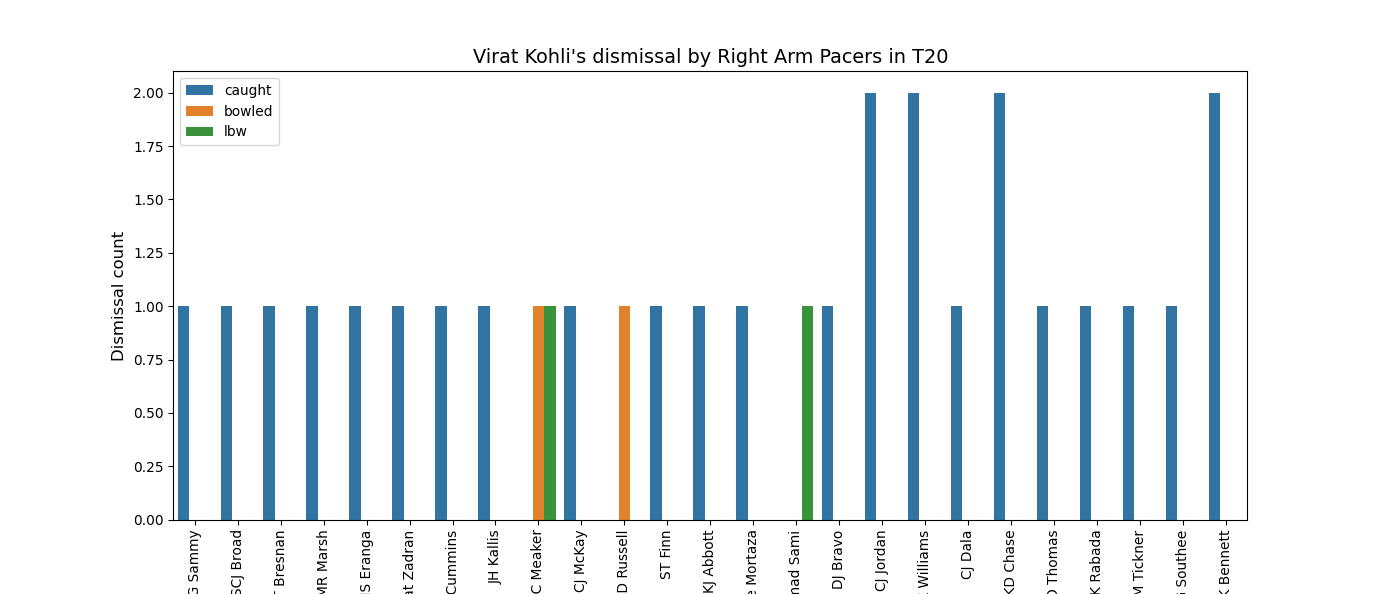

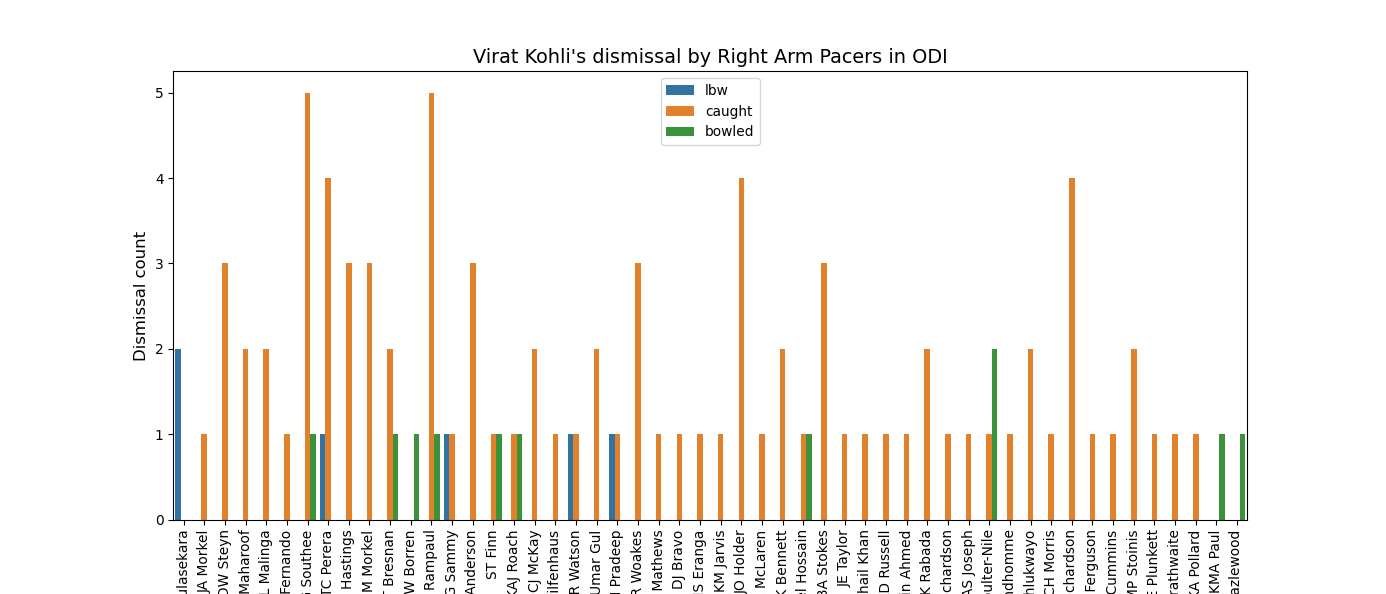

## Against the bowlers like James Anderson, Tim Southee Virat Kohli has got out caught behind or caught in slips so many times.

# 2) Left Arm Pace

### i] Virat Struggles against the left arm fast bowlers IN OR OUT swingers.<br> ii]  He has a very strong flick shot but against the IN SWINGER sometimes he went too much across the line and missed the ball hence, got out BOWLED, LBW or CAUGHT BEHIND.<br> iii]  Against the OUT SWINGING DELIVERY, from left arm pace bowler will take the leading edge and  and Kohli has got out in similar fashion in so many matches.<br> iv] Virat Kohli takes his front foot forward in his initial movement. This, combined with a strong bottom hand makes him predisposed to play the ball on to the leg side, across the pads.<br>Consequently, He is a candidate  for leg before wicket when he misses the ball.

### bwd =  bowled , c_wk = Caught by wicket keeper, lbw -> proves above point

In [139]:
vkohli_dismissal_data[vkohli_dismissal_data.dismissal =='left-arm pace']

,dismissal,span,Dis,bwd,c_fie,c_wk,st,lbw,hw,ro,oth,no,ave,0s,batsman,match_type
8,left-arm pace,2012-2019,7,1,5,1,0,0,0,0,0,0,36.42,1,Virat Kohli,T20
38,left-arm pace,2014-2020,13,1,8,3,0,1,0,0,0,0,49.69,1,Virat Kohli,Test
71,left-arm pace,2008-2019,28,4,16,7,0,1,0,0,0,0,31.14,3,Virat Kohli,ODI


In [ ]:
data_la_pacers = list_of_dismissal_combined[list_of_dismissal_combined.bowler_type == 'left_arm_pace']
plt.figure(figsize=(12,5))
sns.countplot(x = "how out", hue = "match_type",data = data_la_pacers)
plt.legend(prop={'size':10})
plt.title("Virat Kohli's dismissal by Left Arm Pacers",fontsize=30)
plt.xlabel("Dismissal_kind",fontsize=30)
plt.ylabel("Dismissal count",fontsize=30)
plt.show()

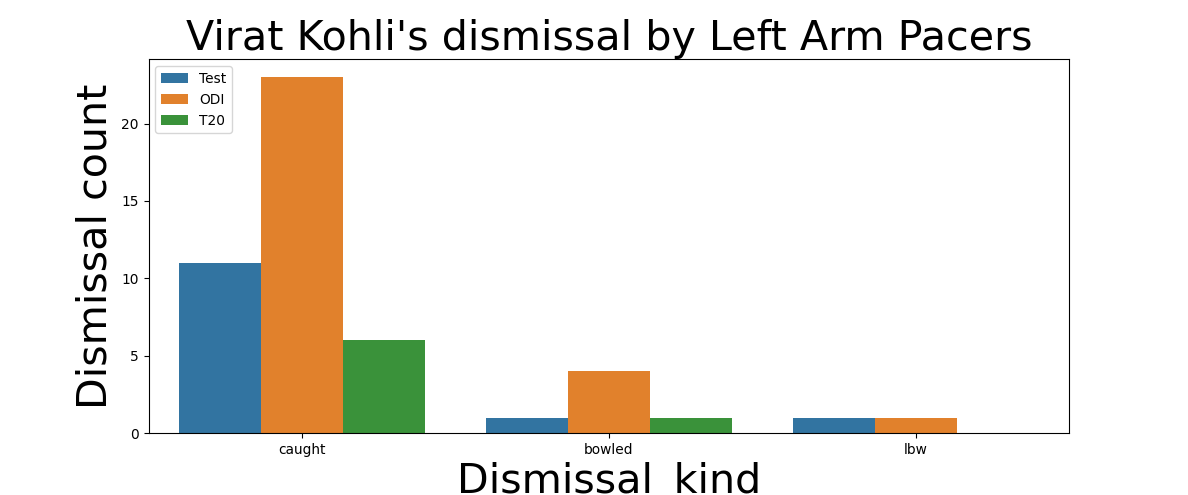

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x = "bowler", hue = "how out",data = data_la_pacers[data_la_pacers.match_type == "Test"])
plt.legend(prop={'size':10})
plt.title("Virat Kohli's dismissal by Left Arm Pacers in Test matches",fontsize=14)
plt.xlabel("Bowlers",fontsize=12)
plt.ylabel("Dismissal count",fontsize=12)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x = "bowler", hue = "how out",data = data_la_pacers[data_la_pacers.match_type == "T20"])
plt.legend(prop={'size':10})
plt.title("Virat Kohli's dismissal by Left Arm Pacers in T20",fontsize=14)
plt.xlabel("Bowlers",fontsize=12)
plt.ylabel("Dismissal count",fontsize=12)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(16,6))
sns.countplot(x = "bowler", hue = "how out",data = data_la_pacers[data_la_pacers.match_type == "ODI"])
plt.legend(prop={'size':10})
plt.title("Virat Kohli's dismissal by Left Arm Pacers in ODI",fontsize=14)
plt.xlabel("Bowlers",fontsize=12)
plt.ylabel("Dismissal count",fontsize=12)
plt.xticks(rotation=90)
plt.show()

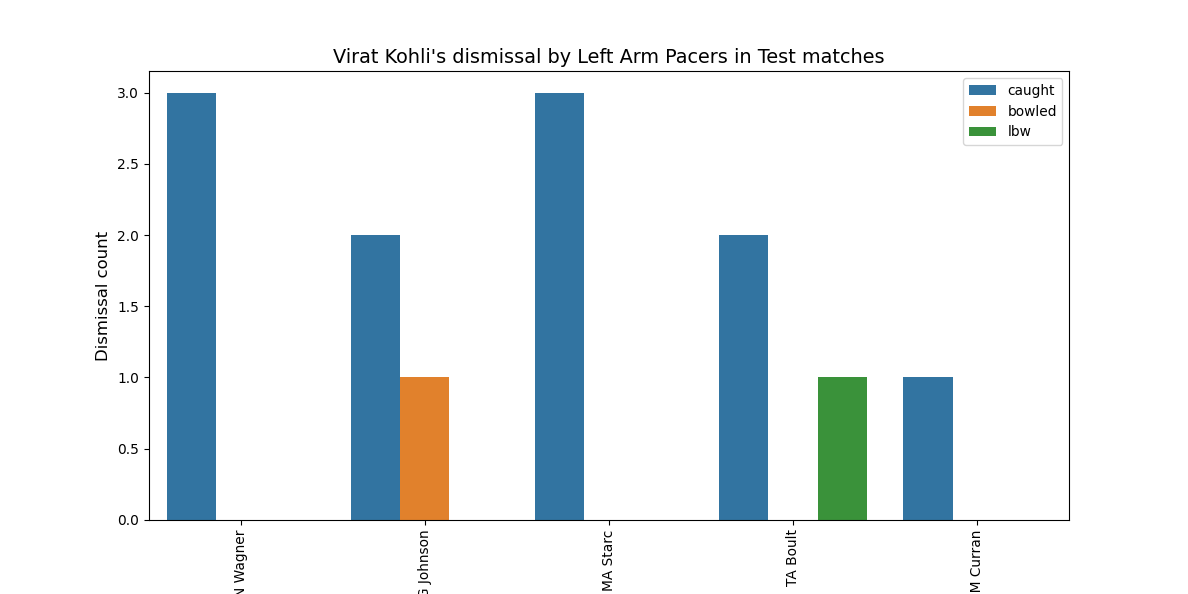

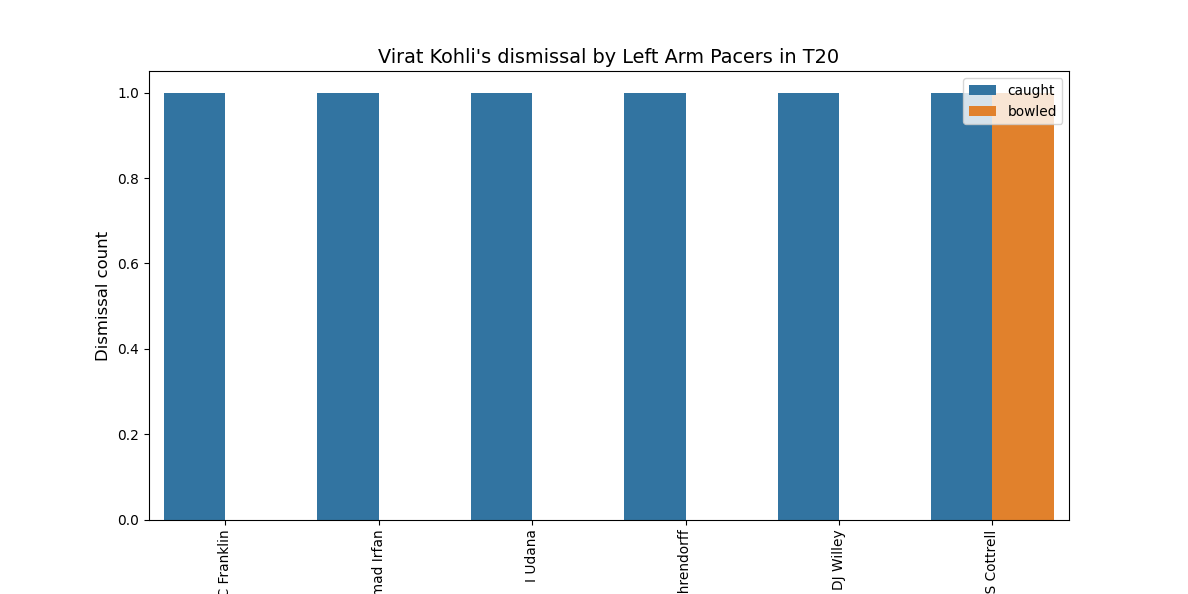

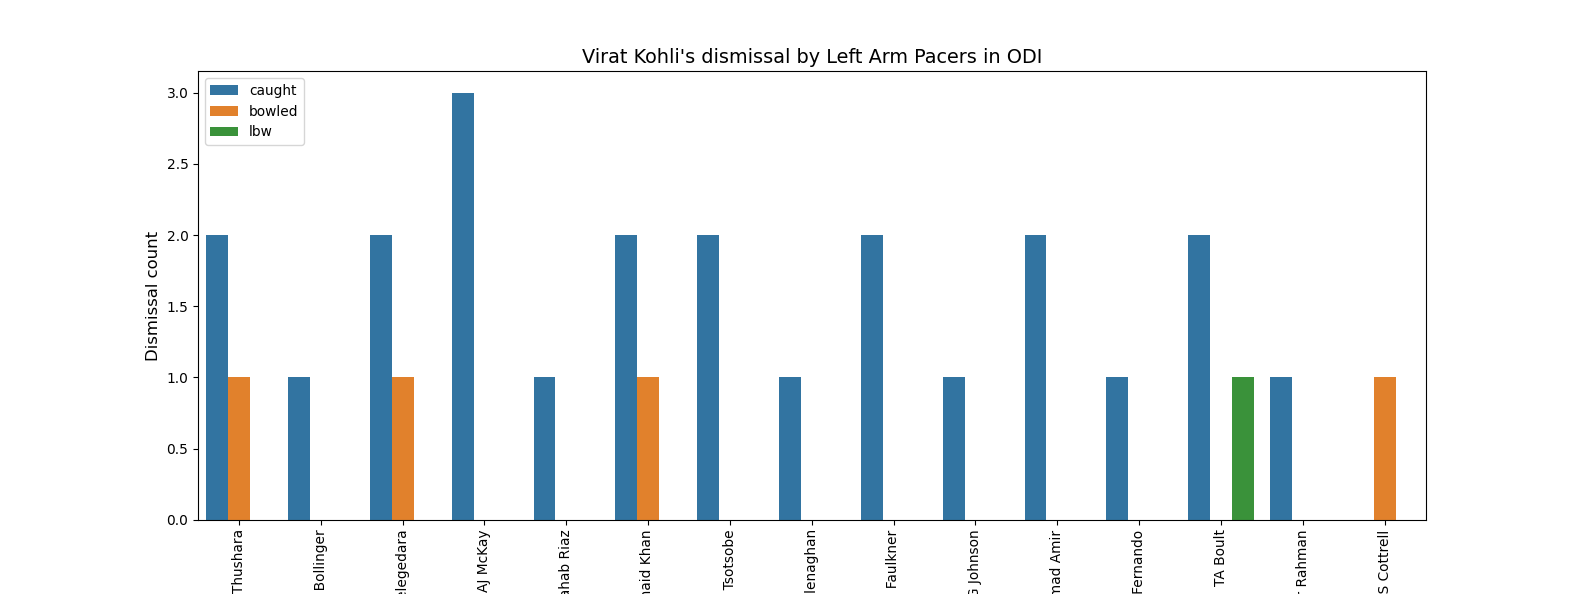

## In All three World Semi Finals, Virat Kohli Got out against left arm bowler.
### In 2011 against Wahab Riaz<br> In 2015 against Mitchell Johnson<br>In 2017 Champions Trophy, final against Mohammad Amir<br>In 2019 against T Boult
### In 2012-13 bilateral series gainst Pakistan he got out against Junaid Khan thrice in 3 ODIs.


# 3) Against Spinners
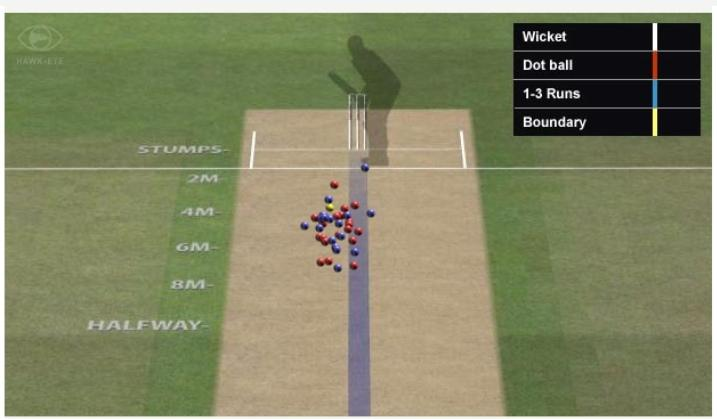

## Virat Struggles against spinners (Leg spinners) speciallly against the googly in shorter formats.
## He has a very strong Cover drive but sometimes he doesn't pick leg spinners googly and misses the line completely, due to this he got out BOWLED or LBW many a times.
### following table shows the number of times he got bowled and LBW against the spinners

In [142]:
vkohli_dismissal_data[(vkohli_dismissal_data.dismissal =='left-arm spin') | 
                     (vkohli_dismissal_data.dismissal =='right-arm spin')]

,dismissal,span,Dis,bwd,c_fie,c_wk,st,lbw,hw,ro,oth,no,ave,0s,batsman,match_type
7,right-arm spin,2011-2019,10,3,6,1,0,0,0,0,0,0,25.80,0,Virat Kohli,T20
9,left-arm spin,2012-2018,3,0,1,1,0,1,0,0,0,0,37.66,0,Virat Kohli,T20
37,right-arm spin,2011-2019,35,2,21,3,0,8,1,0,0,0,61.45,0,Virat Kohli,Test
39,left-arm spin,2012-2019,9,1,6,0,0,2,0,0,0,0,74.44,0,Virat Kohli,Test
70,right-arm spin,2009-2020,44,9,21,4,3,6,1,0,0,0,52.13,0,Virat Kohli,ODI
72,left-arm spin,2009-2017,13,3,7,1,1,1,0,0,0,0,32.61,0,Virat Kohli,ODI


In [143]:
data_spinners = list_of_dismissal_combined[(list_of_dismissal_combined.bowler_type == 'left_arm_spin')| 
                                           (list_of_dismissal_combined.bowler_type == 'right_arm_spin')]


In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x = "how out", hue = "match_type",data = data_spinners)
plt.legend(prop={'size':10})
plt.title("Virat Kohli's dismissal by spinners",fontsize=30)
plt.xlabel("Dismissal_kind",fontsize=30)
plt.ylabel("Dismissal count",fontsize=30)
plt.show()

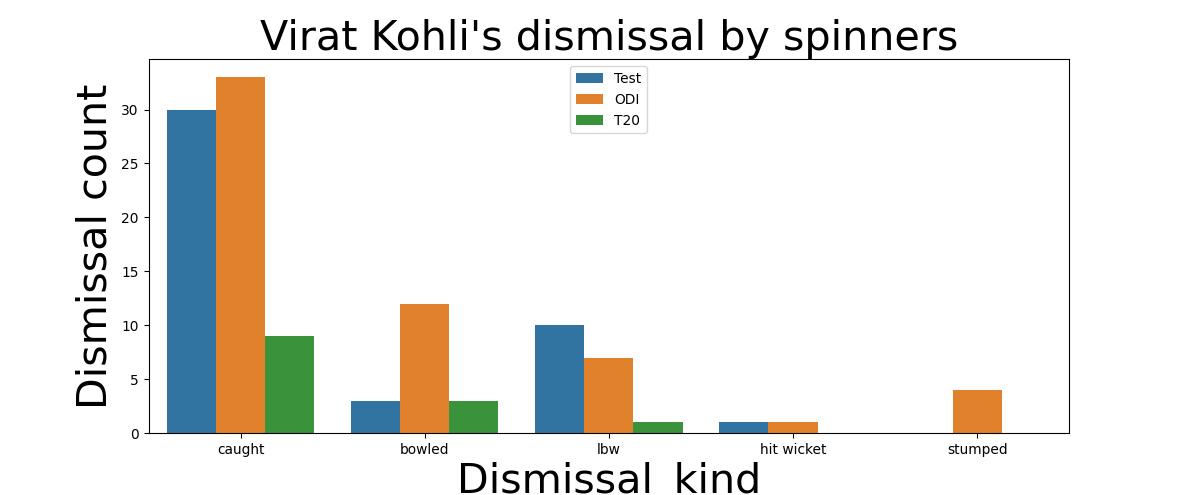

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x = "bowler", hue = "how out",data = data_spinners[data_spinners.match_type == "Test"])
plt.legend(prop={'size':10})
plt.title("Virat Kohli's dismissal by spinners in Test matches",fontsize=14)
plt.xlabel("Bowlers",fontsize=12)
plt.ylabel("Dismissal count",fontsize=12)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x = "bowler", hue = "how out",data = data_spinners[data_spinners.match_type == "T20"])
plt.legend(prop={'size':10})
plt.title("Virat Kohli's dismissal by spinners in T20",fontsize=14)
plt.xlabel("Bowlers",fontsize=12)
plt.ylabel("Dismissal count",fontsize=12)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(16,6))
sns.countplot(x = "bowler", hue = "how out",data = data_spinners[data_spinners.match_type == "ODI"])
plt.legend(prop={'size':10})
plt.title("Virat Kohli's dismissal by spinners in ODI",fontsize=14)
plt.xlabel("Bowlers",fontsize=12)
plt.ylabel("Dismissal count",fontsize=12)
plt.xticks(rotation=90)
plt.show()

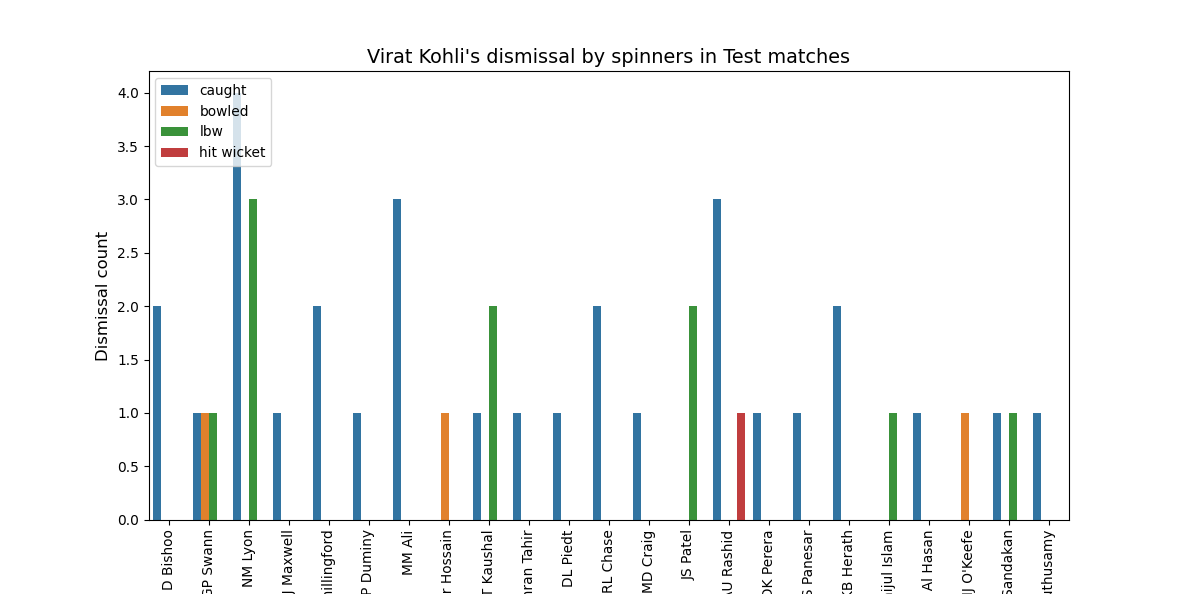

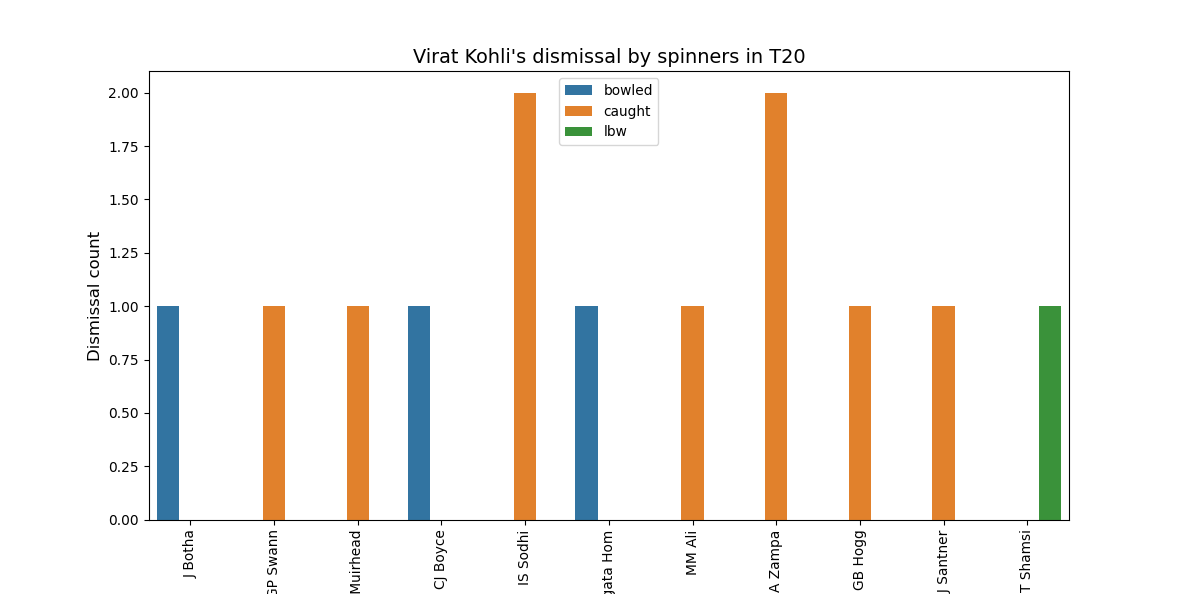

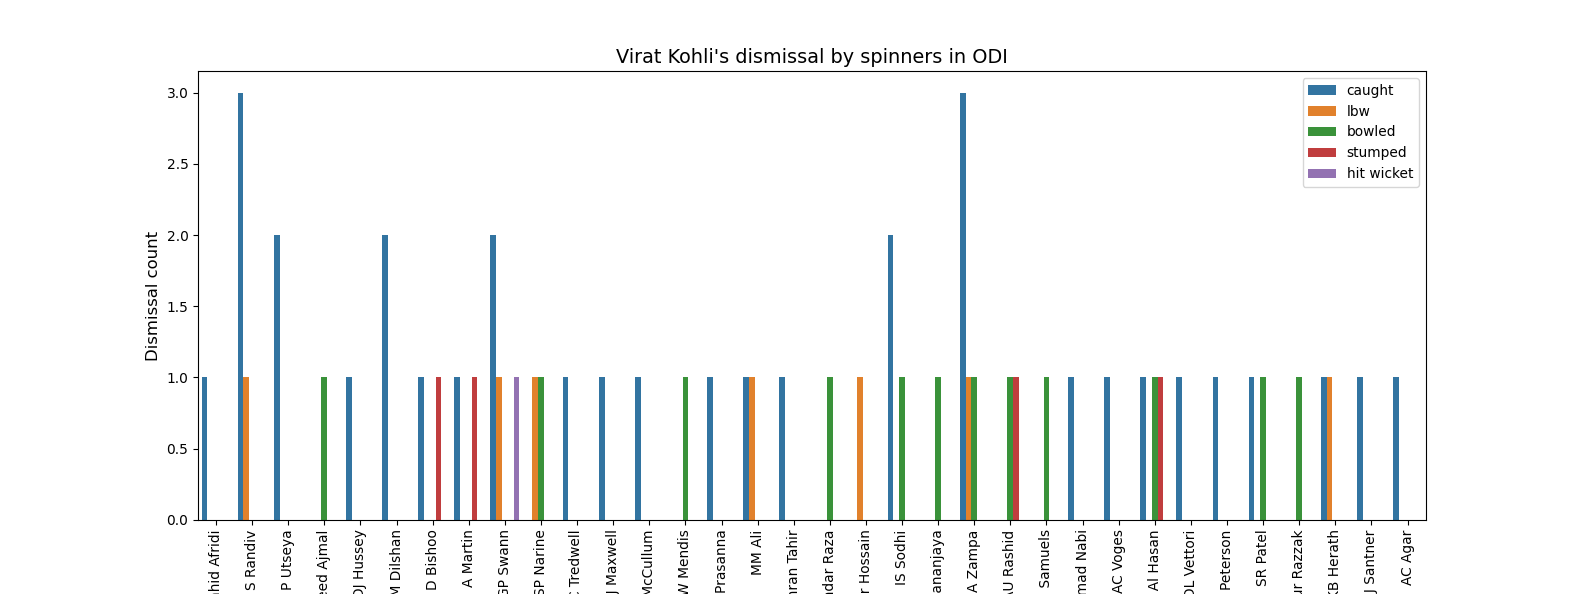

### i] Adam Zampa has dismissed him 7 times in 50 over format.<br>ii] In T20, Kohli has the second highestdot ball percentage against the RIGHT ARM WRIST SPINNERS.<br>iii] 28.74% of deliveries by leg-spinners to Kohli are Dots in T20IS since 2015.<br> iv] In ODIs he has been dismissedby leg-spinners 17 times out of 185.<br> v] Against Adam Zampa, Shreyas Gopal (in IPL) , Adil Rashid, Ish Sodhi, Devendra Bishu, Imran Tahir he had struggled in past

# To Conclude,  Both Leg spinners and Pacers are challenges infront of him.
### He struggles on off stump line with ball swinging away from him.
### Against the left arm fast bowlers he always tries to play ON side. With ball swinging you will always have a chance against him
### With leggies try to bowl away from off stump, he always tries to play hard cover drive if you bowl googlies every now and then he'll struggle.
### Bowling near off stump with ball swinging... Virat Struggles